# Pokemon data analysis
This project aims to find interesting knowledge from the pokemon dataset. There are some main objectives in the following:
 - Data visualization and correlation between attributes
 - Clustering for legend/not legend
 - frequent item set for types

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



First, read the csv file

In [2]:
X_full = pd.read_excel("data.xlsx")

List out the data to see the information

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

As there are too many missing cells on type2 as well as percentage_male, we replace for the following:
 - type2 from null to 'None'
 - percentage_male from null to 0

In [4]:
X_full['type2'].fillna('None', inplace=True)
X_full['percentage_male'].fillna(0, inplace=True)

## Data visualization and correlation between attributes
We are going to plot the scatterplot between different attributes. We want to focus on basic stats and height/weight. Lets have a overview look on heatmap first. We can discover that capture rate has a strong negative impact on other attributes. Also, base total has a strong influence on different basic stats.

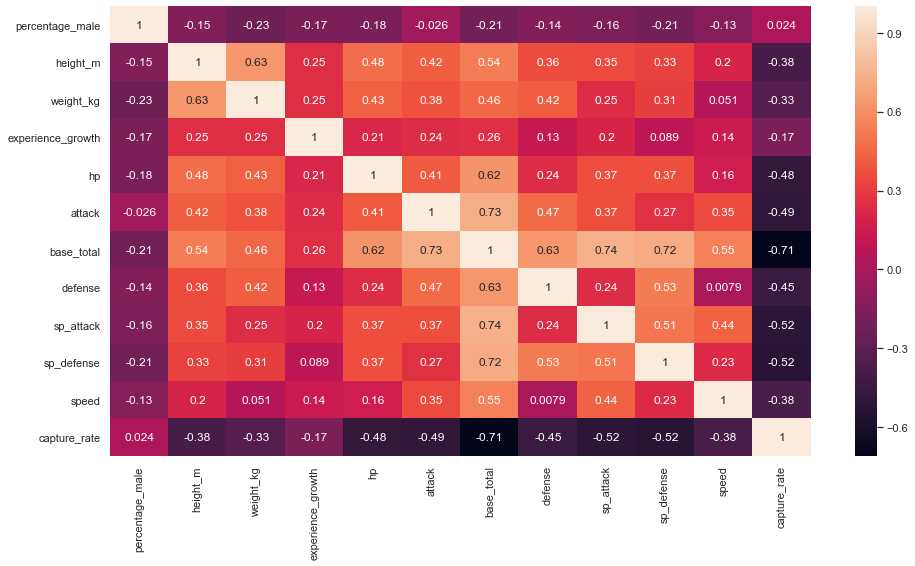

In [97]:
pokemon_mfeatures = ['percentage_male', 'height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
poke_mval = X_full[pokemon_mfeatures]
X = pd.DataFrame(poke_mval)
sns.heatmap(X.corr(), annot = True)

Maybe legend characters have extreme values affecting the accuration and corrlation, so we try to filter out and have a look again. After filtering out legends, there are no much changes on correlation.

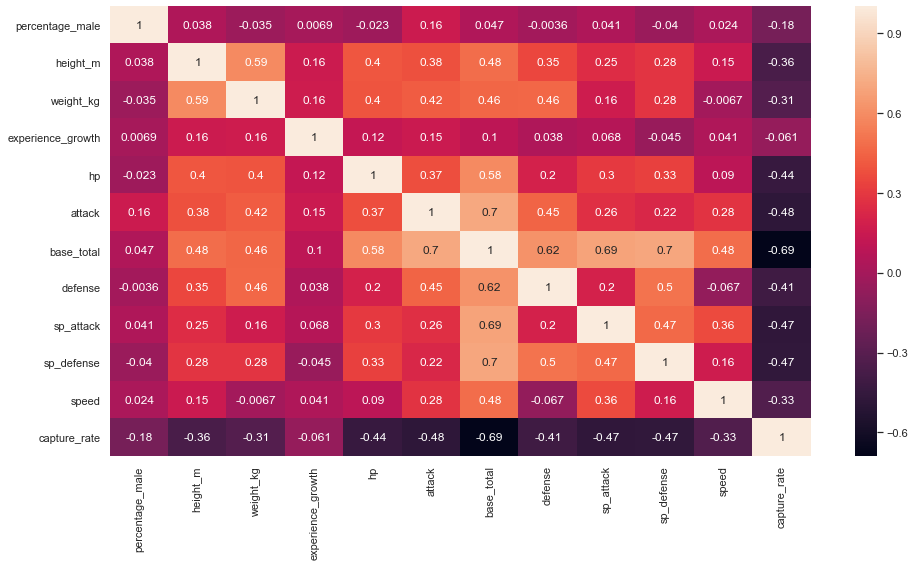

In [71]:
is_not_legend =  X_full['is_legendary']==0
X_not_legend = X[is_not_legend]
X_not_legend = X_not_legend[pokemon_mfeatures]
sns.heatmap(X_not_legend.corr(), annot = True)

Have a look on scatterplot between base total and attack. From the below graph we can discover that there is a positive variation between base_total and attack. 

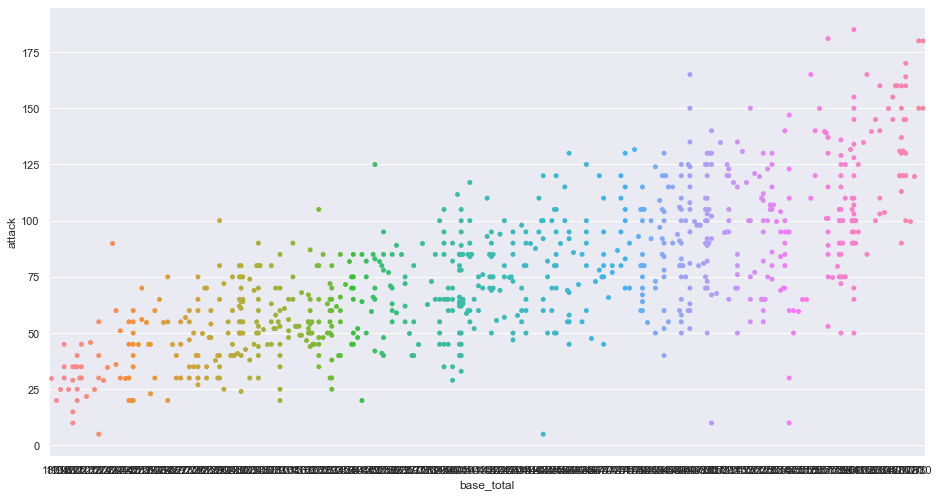

In [72]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['attack'])

Let's calculate different corrlections for attacks and base_total. The pearsons correlation and spearman correlation value between base total and attack are both larger than 0.7.

In [8]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['attack'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['attack'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.730
Spearmans correlation: 0.718


Have a look on scatterplot between base total and hp. From the below graph we can discover that there is a positive variation between base_total and hp. 

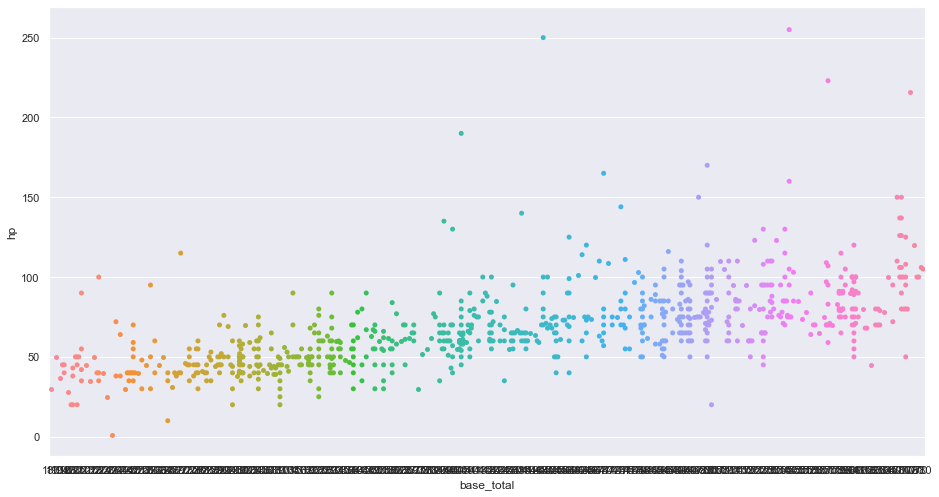

In [73]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['hp'])

Let's calculate different corrlections for hp and base_total. The pearsons correlation and spearman correlation value between base total and hp are both larger than 0.6.

In [10]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['hp'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['hp'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.621
Spearmans correlation: 0.727


Have a look on scatterplot between base total and defense. From the below graph we can discover that there is a positive variation between base_total and defense. 

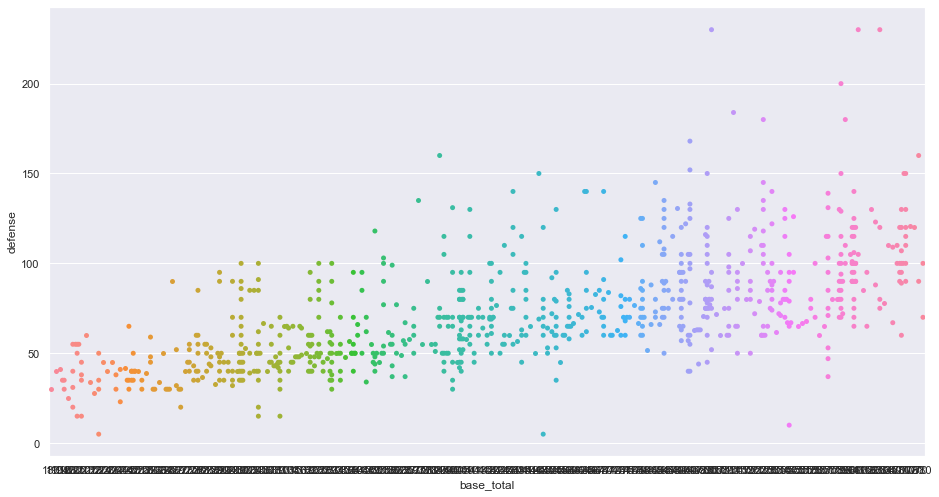

In [74]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['defense'])

Let's calculate different corrlections for defense and base_total. The pearsons correlation and spearman correlation value between base total and defense are both larger than 0.6.

In [12]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['defense'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['defense'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.630
Spearmans correlation: 0.695


Have a look on scatterplot between base total and sp_attack. From the below graph we can discover that there is a positive variation between base_total and sp_attack. 

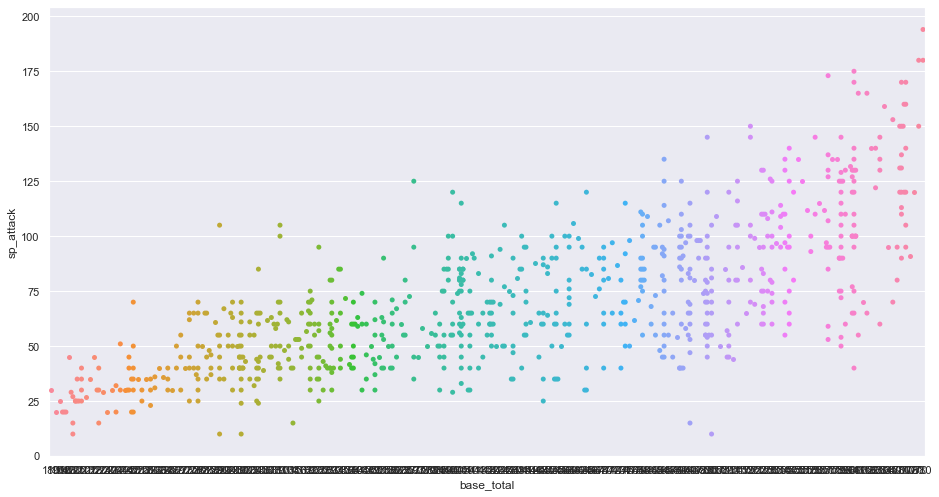

In [75]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['sp_attack'])

Let's calculate different corrlections for sp_attack and base_total. The pearsons correlation and spearman correlation value between base total and sp_attack are both larger than 0.7.

In [14]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['sp_attack'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['sp_attack'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.741
Spearmans correlation: 0.725


Have a look on scatterplot between base total and sp_defense. From the below graph we can discover that there is a positive variation between base_total and sp_defense. 

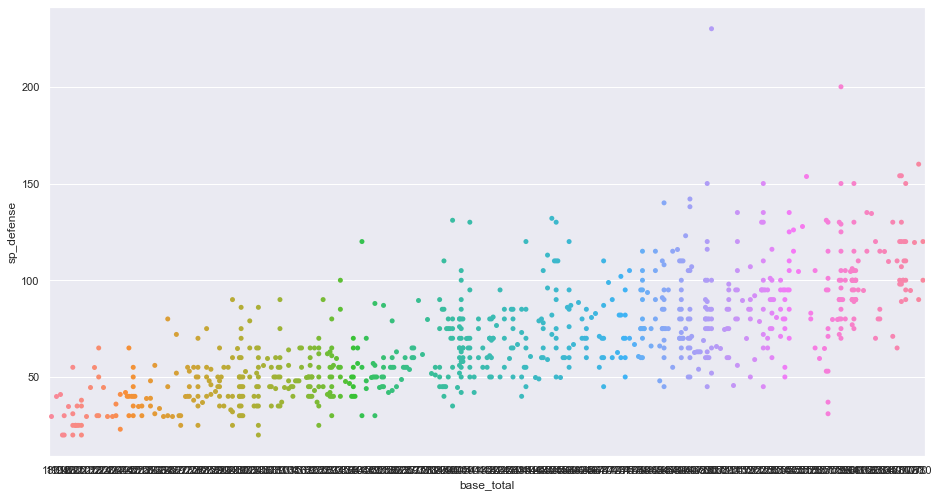

In [76]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['sp_defense'])

Let's calculate different corrlections for sp_defense and base_total. The pearsons correlation and spearman correlation value between base total and sp_defense are both larger than 0.7.

In [16]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['sp_defense'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['sp_defense'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.717
Spearmans correlation: 0.755


Have a look on scatterplot between base total and capture_rate. From the below graph we can discover that there is a negative variation between base_total and capture_rate. 

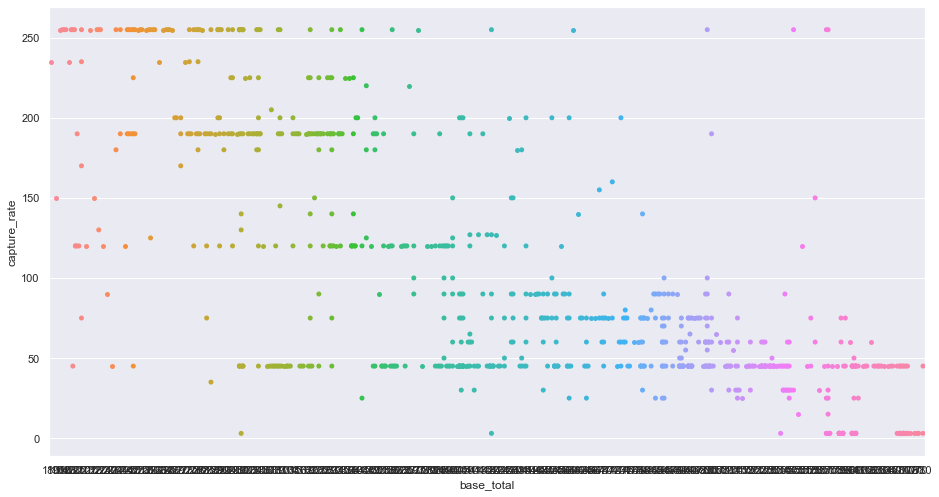

In [77]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['capture_rate'])

Let's calculate different corrlections for capture_rate and base_total. The pearsons correlation and spearman correlation value between base total and capture_rate are both smaller than -0.7.

In [18]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['capture_rate'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['capture_rate'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.709
Spearmans correlation: -0.708


## Frequent itemset
First, we are going to find out the number of having multi-types.

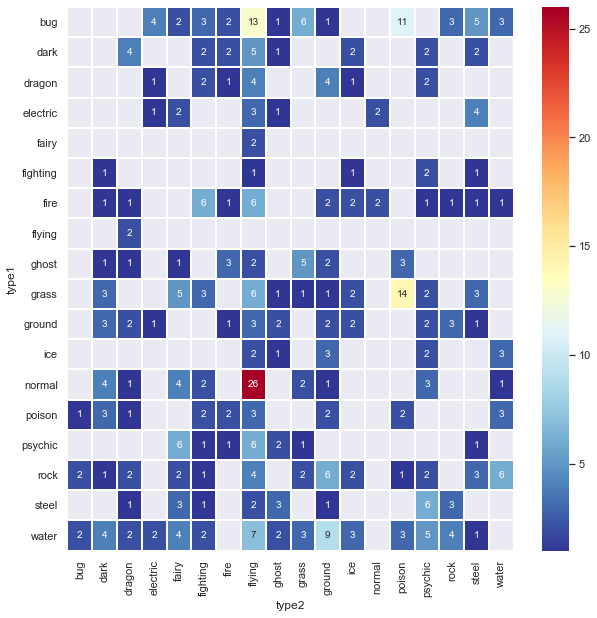

In [19]:
plt.subplots(figsize=(10, 10))
sns.heatmap(
    X_full[X_full['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "RdYlBu_r" # color
)

plt.show()

To implement Apriori Algorithm, our dataset should be a form of array of arrays. Therefore, we convert our dataset by the following script:

In [20]:
records = []
X_full['type1'][0]
for i in range(0, 800):
    record = []
    record.append(X_full['type1'][i])
    if X_full['type2'][i] != "None":
        record.append(X_full['type2'][i])
    records.append(record)

Implementing apriori algorithm. We are using apyori library. As the majority of pokemon has only one type, it is hard to have rules with large min_support as well as confidence. Therefore, we set min_support to 0.0045, min_confidence to 0.15 and min_lift for 1.5 to see the rules. *When a pokemon belongs to more than one type, the following rules are likely to happen.*

In [21]:
from apyori import apriori
association_rules = apriori(records, min_support=0.0045, min_confidence=0.15, min_lift=1.5, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['bug'] -> ['poison']
Support: 0.015
Confidence: 0.15584415584415584
Lift: 1.948051948051948
Rule: ['flying'] -> ['normal']
Support: 0.0325
Confidence: 0.2653061224489796
Lift: 1.947200898708107
Rule: ['poison'] -> ['grass']
Support: 0.0175
Confidence: 0.21875000000000003
Lift: 1.8041237113402064
Rule: ['rock'] -> ['ground']
Support: 0.01125
Confidence: 0.15254237288135594
Lift: 1.9067796610169492
Rule: ['steel'] -> ['psychic']
Support: 0.00875
Confidence: 0.15555555555555556
Lift: 1.5176151761517616


Lets also have a look on abilities. A pokemon can have from 1 to 6 different abilities. We are going to implement apriori algorithm again to find the rules. This time, we use a higher confidence of 0.7 as the pokemon is more likely to have multipile abilies. We found some interesting rules on abilities. 

In [67]:
records = []
for i in range(0, 800):
    record = []
    abilitiesStrParts = X_full["abilities"][i].split(",")
    for j in range(len(abilitiesStrParts)):
        abilitiesStrParts[j] = abilitiesStrParts[j].strip()
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("[")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("]")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("'")
        record.append(abilitiesStrParts[j])
    records.append(record)
association_rules = apriori(records, min_support=0.01, min_confidence=0.5, min_lift=1, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Moxie'] -> ['Intimidate']
Support: 0.01
Confidence: 0.6153846153846154
Lift: 15.88089330024814
Rule: ['Magnet Pull'] -> ['Sturdy']
Support: 0.01
Confidence: 1.0
Lift: 21.05263157894737
Rule: ['Rock Head'] -> ['Sturdy']
Support: 0.01375
Confidence: 0.5499999999999999
Lift: 11.578947368421051
Rule: ['Water Veil'] -> ['Swift Swim']
Support: 0.01125
Confidence: 0.8181818181818181
Lift: 17.22488038277512


We can also combine abilities and types to see if there are any hidden rules between abilities and types.

In [64]:
records = []
for i in range(0, 800):
    record = []
    abilitiesStrParts = X_full["abilities"][i].split(",")
    for j in range(len(abilitiesStrParts)):
        abilitiesStrParts[j] = abilitiesStrParts[j].strip()
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("[")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("]")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("'")
        record.append(abilitiesStrParts[j])
        record.append(X_full['type1'][i])
        if X_full['type2'][i] != "None":
            record.append(X_full['type2'][i])
    records.append(record)
association_rules = apriori(records, min_support=0.02, min_confidence=0.6, min_lift=1, min_length=1)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Blaze'] -> ['fire']
Support: 0.02875
Confidence: 1.0
Lift: 12.5
Rule: ['Chlorophyll'] -> ['grass']
Support: 0.04375
Confidence: 1.0
Lift: 8.247422680412372
Rule: ['Damp'] -> ['water']
Support: 0.02
Confidence: 0.888888888888889
Lift: 5.42832909245123
Rule: ['Flame Body'] -> ['fire']
Support: 0.02
Confidence: 1.0
Lift: 12.5
Rule: ['Flash Fire'] -> ['fire']
Support: 0.02125
Confidence: 1.0
Lift: 12.5
Rule: ['Hydration'] -> ['water']
Support: 0.02
Confidence: 0.7272727272727273
Lift: 4.441360166551006
Rule: ['Leaf Guard'] -> ['grass']
Support: 0.02375
Confidence: 1.0
Lift: 8.247422680412372
Rule: ['Overgrow'] -> ['grass']
Support: 0.02875
Confidence: 1.0
Lift: 8.247422680412372
Rule: ['Sand Veil'] -> ['ground']
Support: 0.0225
Confidence: 0.8181818181818181
Lift: 10.227272727272727
Rule: ['Sturdy'] -> ['rock']
Support: 0.03125
Confidence: 0.6578947368421053
Lift: 8.920606601248886
Rule: ['Swarm'] -> ['bug']
Support: 0.03125
Confidence: 1.0
Lift: 10.38961038961039
Rule: ['Swift Swi

## K-Means Clustering for types
Can we cluster the data to classify the types of a pokemon? It is a little bit hard to have 18 clusters at the same time. Therefore, I will comparing them one to one, like dragon vs normal for example. First, we filter out pokemons which is neither belongs to dragon nor normal. 

In [117]:
dragon_or_normal = X_full[X_full['type1'].isin(['dragon', 'normal'])][pokemon_mfeatures]
type_actual = X_full[X_full['type1'].isin(['dragon', 'normal'])]['type1']
df_norm = dragon_or_normal.copy()

Then, we implement kMeans clustering to see if we can have a good cluster. The first cluster represents the actual cluster and the second one represents the kmeans cluster. We can discover that kMeans did a good job at this moment, as it have a similar cluster compare to the actual cluster for dragon vs normal.

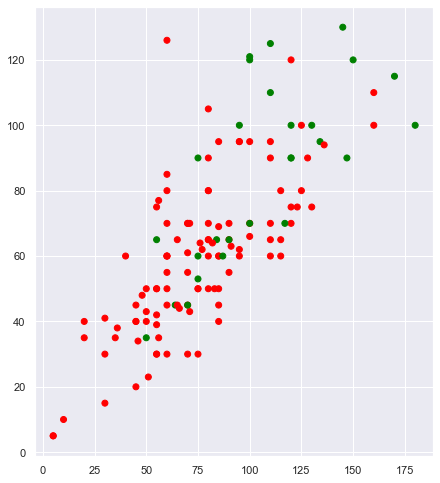

In [160]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_norm.fillna(0, inplace=True)
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_norm[pokemon_mfeatures])
type_kmeans = kmeans.predict(df_norm)
def mapTypeToColor(n): 
    if n == "normal":
        return "red"
    return "green"
type_actual_map = map(mapTypeToColor,type_actual)

plt.figure()
plt.subplot(122)
plt.scatter(df_norm['attack'],df_norm['defense'],c=list(type_actual_map))

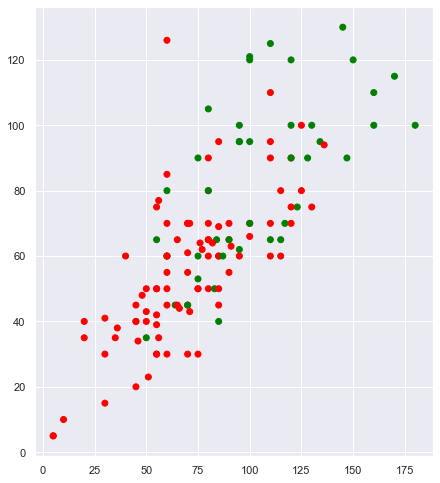

In [161]:
plt.figure()
plt.subplot(121)
def mapBoolToColor(n): 
    if n == 0:
        return "red"
    return "green"
type_actual_map = map(mapBoolToColor,type_actual)
type_predict_map = map(isNormal,type_kmeans)
plt.scatter(df_norm['attack'],df_norm['defense'],c=list(type_predict_map))